In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [25]:
class LogisticRegression:
    
    def __init__(self, lr = 0.01, lamb = 10, num_iter = 1000, fit_intercept = True):
        self.lr = lr
        self.lamb = lamb
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
    
    def __add_intercept(self, X):
        '''This function adds an offset term'''
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1) 
    
    def __sigmoid(self, z):
        '''***Define Sigmoid Function here. z is a vector***'''
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.random.normal(size=(X.shape[1], 1), scale=1/np.sqrt(X.shape[1]))
        
        for i in range(self.num_iter):
            z = np.dot(X,self.theta)
            h = self.__sigmoid(z)
            '''***[Critical Step] - Using the formula in question prompt define gradient in vector form***'''
            error = h - y.reshape(-1,1)
            augmented_theta = np.concatenate((np.zeros((1,1)), self.theta[1:]), axis=0)
            gradient = X.T.dot(error)/len(y) + self.lamb * augmented_theta
            
            '''***[Critical Step] - Update theta using the gradient and learning rate***'''
            self.theta -= self.lr * gradient
    
    def predict_prob(self, X):
        ''' This function outputs the predicted probablities'''
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X,self.theta))
    
    def predict(self, X, threshold=0.5):
        ''' This function outputs the predicted labels'''
        # usually we take threshold as 0.5
        return self.predict_prob(X) >= threshold

def logistic_loss(y, y_prob):
    '''This function calculates the logistic loss'''
    return -np.mean(y*np.log(y_prob) + (1-y)*np.log(1-y_prob))

def create_x_tilde(X):
    '''This function creates the polynomial features'''
    X_tilde = np.ones((X.shape[0], 1))
    for i in range(1, 7):
        for j in range(i+1):
            new_col = (X[:, 0]**(i-j))*(X[:, 1]**j)
            new_col = new_col.reshape(-1, 1)
            X_tilde = np.concatenate((X_tilde, new_col), axis=1)
    return X_tilde

    

# Loading Data

In [46]:
file_name = 'ex2data2.txt'

data = np.loadtxt(file_name, delimiter=',')
X = data[:, :2]
Y = data[:, 2]

X = create_x_tilde(X)
total = np.concatenate((X, Y.reshape(-1,1)), axis=1)
np.random.shuffle(total)

X = total[:, :-1]
Y = total[:, -1]

kf = KFold(n_splits=6)

Lamda: 0.0000
  Accuracy: 0.8294 Train Loss: 0.4215 Test Loss: 0.3722
Lamda: 0.0005
  Accuracy: 0.8294 Train Loss: 0.4262 Test Loss: 0.3787
Lamda: 0.0010
  Accuracy: 0.8294 Train Loss: 0.4289 Test Loss: 0.3842
Lamda: 0.0015
  Accuracy: 0.8294 Train Loss: 0.4342 Test Loss: 0.3905
Lamda: 0.0020
  Accuracy: 0.8294 Train Loss: 0.4389 Test Loss: 0.3972
Lamda: 0.0025
  Accuracy: 0.8294 Train Loss: 0.4432 Test Loss: 0.4034
Lamda: 0.0030
  Accuracy: 0.8206 Train Loss: 0.4482 Test Loss: 0.4090
Lamda: 0.0035
  Accuracy: 0.8206 Train Loss: 0.4529 Test Loss: 0.4149
Lamda: 0.0040
  Accuracy: 0.8206 Train Loss: 0.4578 Test Loss: 0.4202
Lamda: 0.0045
  Accuracy: 0.8206 Train Loss: 0.4621 Test Loss: 0.4256
Lamda: 0.0051
  Accuracy: 0.8206 Train Loss: 0.4667 Test Loss: 0.4308
Lamda: 0.0056
  Accuracy: 0.8206 Train Loss: 0.4707 Test Loss: 0.4357
Lamda: 0.0061
  Accuracy: 0.8206 Train Loss: 0.4750 Test Loss: 0.4405
Lamda: 0.0066
  Accuracy: 0.8206 Train Loss: 0.4788 Test Loss: 0.4451
Lamda: 0.0071
  Accu

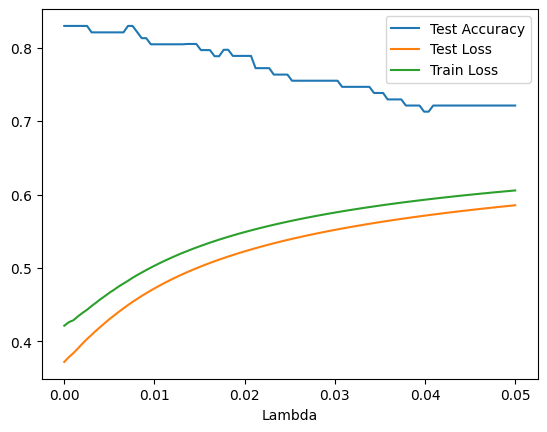

In [47]:
lambdas = np.linspace(0, .05, 100)

accuracies = []
train_losses = []
test_losses = []

for lamb in lambdas:
    acc_lambda = []
    train_lambda = []    
    test_lambda = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]

        # Train the model
        model = LogisticRegression(lr=.1, lamb=lamb, num_iter=3000, fit_intercept=False) 
        model.fit(X_train, Y_train) 

        # Generate Predictions
        preds = model.predict(X_test)

        # accuracy
        accuracy = (preds.flatten() == Y_test).mean()
        test_loss = logistic_loss(Y_test, model.predict_prob(X_test).flatten())
        train_loss = logistic_loss(Y_train, model.predict_prob(X_train).flatten())

        acc_lambda.append(accuracy)
        test_lambda.append(train_loss)
        train_lambda.append(test_loss)

    accuracy_mean = np.mean(acc_lambda)
    test_mean = np.mean(test_lambda)
    train_mean = np.mean(train_lambda)

    print(f"Lamda: {lamb:.4f}")
    print(f"  Accuracy: {accuracy_mean:.4f} Train Loss: {train_mean:.4f} Test Loss: {test_mean:.4f}")

    accuracies.append(accuracy_mean)
    test_losses.append(test_mean)
    train_losses.append(train_mean)

plt.plot(lambdas, accuracies, label='Test Accuracy')
plt.plot(lambdas, test_losses, label='Test Loss')
plt.plot(lambdas, train_losses, label='Train Loss')
plt.xlabel('Lambda')
plt.legend()
plt.show()
